# 브랜드별 top 랭킹안에 걸려있는 상품 카테고리 1위 제품의 좋아요 수 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt # 그래프 출력
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns

# 경고 메시지 처리
import warnings

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/Nato/NotoSansKR-Black.otf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

# 경고메시지 출력 생략
warnings.filterwarnings('ignore')

# 런타임을 다시 실행시켜야 한글폰트가 적용됩니다

Noto Sans KR


In [3]:
musinsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alpaco/Team_1. CODEnter [ Save Form : Name_FileName_Date ]/2. SUB _ MUSINSA/MUSINSA_1st_file/musinsa_rank_data_220408.csv', index_col=0)

df = pd.DataFrame(musinsa)
df


,상품고유코드,순위,브랜드명,상품명,Countlike,브랜드url,할인전가격,할인후가격,brandname,like,Category,sub_Category,pageview,purchase
0,1778404,1,토피,2WAY 스웻 후드 집업 (MELANGE GREY),108964,https://www.musinsa.com/brands/toffee,"45,000원","39,900원",toffee,40073,아우터,후드 집업,431174,134274
1,1551840,2,제로,Deep One Tuck Sweat Pants [Grey],118414,https://www.musinsa.com/brands/xero,"39,000원",not sale,xero,40489,바지,트레이닝/조거 팬츠,390822,133499
2,577636,3,아디다스,BW 아미 - 화이트 / BZ0579,63571,https://www.musinsa.com/brands/adidas,"139,000원",not sale,adidas,228451,스니커즈,캔버스/단화,194820,42414
3,750908,4,후러브스아트,유니섹스 세미 와이드 밴딩 슬랙스,154532,https://www.musinsa.com/brands/wholovesart,"54,000원","33,900원",wholovesart,8194,바지,슈트 팬츠/슬랙스,531731,208583
4,810034,5,컨버스,척 70 클래식 블랙 162058C,78318,https://www.musinsa.com/brands/converse,"95,000원",not sale,converse,126057,스니커즈,캔버스/단화,144714,40383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2357810,986,뉴발란스,NBPFCS179L / MT410KF5 (WHITE),2383,https://www.musinsa.com/brands/newbalance,"89,000원",not sale,newbalance,60526,스니커즈,러닝화/피트니스화,33699,651
986,2318477,987,커버낫,스몰 어센틱 로고 후디 집업 멜란지 그레이,2420,https://www.musinsa.com/brands/covernat,"89,000원","71,200원",covernat,246051,아우터,후드 집업,34558,881
987,2407403,988,푸마 셀렉트,푸마Ⅹ아미 후드 티셔츠 - 그린 / 534069-96,637,https://www.musinsa.com/brands/pumaselect,"189,000원",not sale,pumaselect,1761,상의,후드 티셔츠,27646,309
988,2105470,989,소버먼트,980g pigment CUT hoody zip up-chacoal-,2967,https://www.musinsa.com/brands/sovermentwithlo...,"122,500원","73,500원",sovermentwithlomort,23789,아우터,후드 집업,14965,1652


In [4]:
brand_cnt = df['브랜드명'].value_counts()

brand_cnt[brand_cnt > 5].sum()

671

In [5]:
drop_df = pd.DataFrame(df['브랜드명'].value_counts())
drop_df = drop_df.reset_index()

In [6]:
drop_df.columns = ['브랜드명', 'count']
drop_df

,브랜드명,count
0,무신사 스탠다드,95
1,라퍼지스토어,31
2,아디다스,28
3,예일,27
4,드로우핏,27
...,...,...
220,롤링스튜디오,1
221,포맨트,1
222,커스텀에이드,1
223,몬스터리퍼블릭,1


In [ ]:
drop_under_5 = []

for i in range(len(drop_df['브랜드명'])):
    if drop_df['count'][i] > 5:
        drop_under_5.append(drop_df['브랜드명'][i])

drop_under_5

In [8]:
use_brand = df[df['브랜드명'].isin(drop_under_5)].reset_index()

In [9]:
sort_brand = use_brand.sort_values('브랜드명').reset_index()

# sort_brand_df = pd.DataFrame(sort_brand).reset_index()
# sort_brand_df

In [10]:
sort_brand

,level_0,index,상품고유코드,순위,브랜드명,상품명,Countlike,브랜드url,할인전가격,할인후가격,brandname,like,Category,sub_Category,pageview,purchase
0,421,590,1166912,591,86로드,2724 Washing denim jacket (L.blue),7921,https://www.musinsa.com/brands/86road,"91,000원","59,000원",86road,23667,아우터,트러커 재킷,42418,2261
1,354,491,638590,492,86로드,2724 Washing denim jacket (Black),22059,https://www.musinsa.com/brands/86road,"91,000원","59,000원",86road,23667,아우터,트러커 재킷,50257,3777
2,665,978,1084249,979,86로드,[테이퍼드핏]I CREAM CHIP,13484,https://www.musinsa.com/brands/86road,"69,000원","49,000원",86road,23667,바지,데님 팬츠,14099,3280
3,652,955,1246217,956,86로드,[테이퍼드핏]CHARMING BLUE CHIP,6266,https://www.musinsa.com/brands/86road,"84,000원","49,000원",86road,23667,바지,데님 팬츠,18458,3941
4,116,149,1188785,150,86로드,[테이퍼드핏]BLACK NORMAL CHIP,36598,https://www.musinsa.com/brands/86road,"84,000원","49,000원",86road,23667,바지,데님 팬츠,52932,19210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,435,606,2096933,607,필루미네이트,오버핏 아치 로고 스웨트 셔츠-네이비,4784,https://www.musinsa.com/brands/filluminate,"54,000원","39,900원",filluminate,41689,상의,맨투맨/스웨트셔츠,25335,4007
667,222,293,2184674,294,필루미네이트,[세트]베네핏 트레이닝 셋업-오트밀,14996,https://www.musinsa.com/brands/filluminate,"106,000원","69,000원",filluminate,41689,상의,후드 티셔츠,25808,4453
668,242,323,2171559,324,필루미네이트,오버핏 아치 로고 스웨트 셔츠-그린,8240,https://www.musinsa.com/brands/filluminate,"54,000원","39,900원",filluminate,41689,상의,맨투맨/스웨트셔츠,52334,5063
669,662,972,2096934,973,필루미네이트,오버핏 아치 로고 스웨트 셔츠-블랙,3159,https://www.musinsa.com/brands/filluminate,"54,000원","39,900원",filluminate,41689,상의,맨투맨/스웨트셔츠,13475,2710


In [11]:
max_like = sort_brand[['브랜드명','순위','like', 'Category']].groupby('브랜드명').max()
max_like = max_like.sort_values('like', ascending=False).reset_index()

In [12]:
max_like['Category'].unique()

array(['아우터', '양말/레그웨어', '스니커즈', '상의', '신발', '바지', '여성 가방', '액세서리',
       '디지털/테크'], dtype=object)

In [13]:
colors = {
    '아우터' : 'blue', 
    '양말/레그웨어' : 'orange', 
    '스니커즈' : 'green', 
    '상의' : 'red', 
    '신발' : 'purple', 
    '바지' : 'brown', 
    '여성 가방' : 'pink', 
    '액세서리' : 'gray',
    '디지털/테크' : 'olive'
}
c = max_like['Category'].apply(lambda x: colors[x])

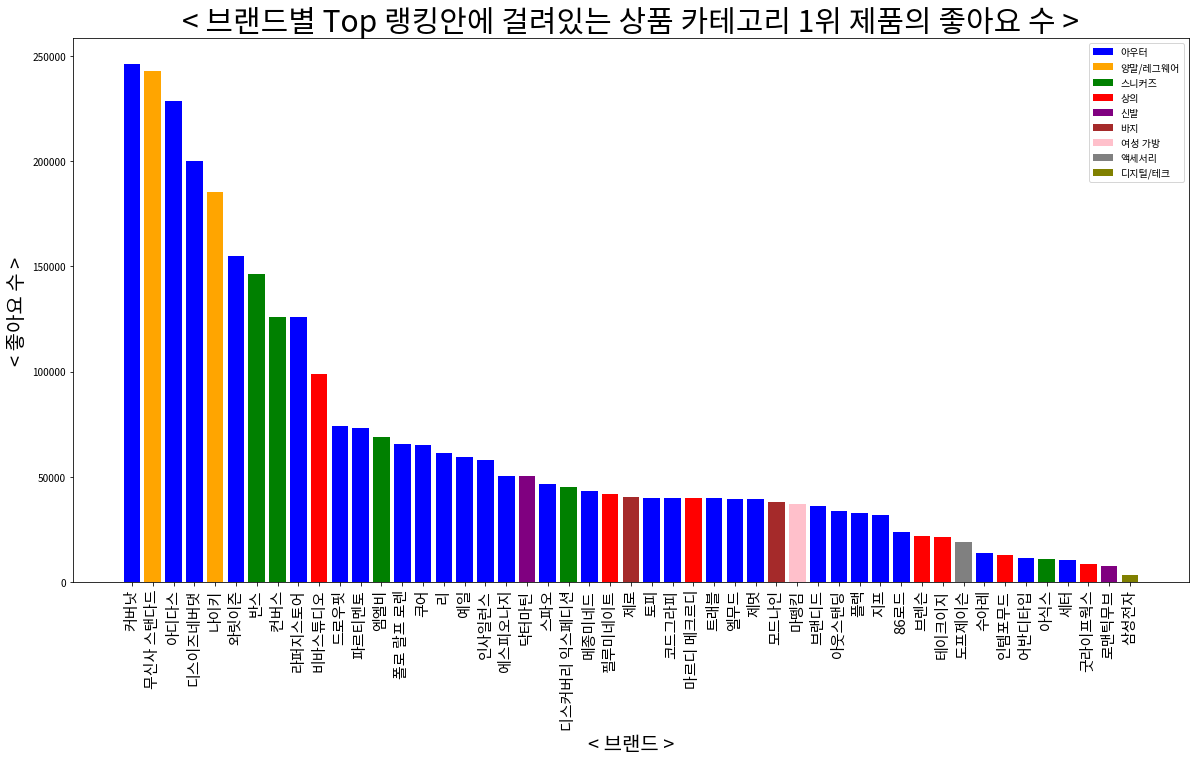

In [14]:
ax = plt.subplot(111)
bars = ax.bar(x='브랜드명', height='like', data=max_like, color = c)
for i, j in colors.items(): #Loop over color dictionary
    ax.bar(max_like['브랜드명'], max_like['like'], width=0, color=j, label=i)

ax.legend()
plt.title('< 브랜드별 Top 랭킹안에 걸려있는 상품 카테고리 1위 제품의 좋아요 수 >',fontsize = 30)

plt.xlabel('< 브랜드 >',fontsize = 20)
plt.ylabel('< 좋아요 수 >',fontsize = 20)
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

# 할인률이 제일 높은 브랜드와 할인률에 따른 실질 구매 전환률 

In [15]:
sale_df = use_brand[['순위','브랜드명','할인전가격','할인후가격','pageview','purchase']]
sale_df.dtypes

순위           int64
브랜드명        object
할인전가격       object
할인후가격       object
pageview     int64
purchase     int64
dtype: object

In [16]:
# not sale >>> '=할인전가격' 으로 변경
new_list = []

for i in range(len(use_brand['할인후가격'])):
  if use_brand['할인후가격'][i] != 'not sale':
      new_list.append(use_brand['할인후가격'][i])
  else:
    new_list.append(use_brand['할인전가격'][i])



In [17]:
new_list_df = pd.DataFrame(new_list)
new_list_df.columns=['할인후가격']

# 할인후가격 
# '원' 없애기 [ replace > regex = True, inplace = True] / regex=True : 부분일치의 경우, 해당 문자가 포함되어 있으면 문자가 대체 ]

new_list_df.replace('원','',regex = True, inplace = True)
af1_df = new_list_df
af1_df.replace(',','',regex = True, inplace = True)
af1_df

,할인후가격
0,39900
1,39000
2,139000
3,95000
4,225000
...,...
666,69000
667,39500
668,46400
669,71200


In [18]:
# 할인전가격
bf1 = use_brand['할인전가격']

bf1.replace('원','',regex = True, inplace = True)
bf1_df = pd.DataFrame(bf1)
bf1_df.replace(',','',regex = True, inplace = True)
bf1_df

,할인전가격
0,45000
1,39000
2,139000
3,95000
4,339000
...,...
666,69000
667,79000
668,58000
669,89000


In [19]:
# ((할인전가격 - 할인후가격) / 할인전가격 )*100 = 할인률(%)

bf = pd.Series(use_brand['할인전가격'])
af = pd.Series(new_list_df['할인후가격'])

bf_df = pd.DataFrame(bf1_df).astype(int)
af_df = pd.DataFrame(af1_df).astype(int)


sale_data = pd.concat([bf_df,af_df],axis=1)
# sale_data

sale_rate = ((sale_data['할인전가격'] - sale_data['할인후가격'])/sale_data['할인전가격'])*10
# sale_rate

sale_data['할인률(%) / 10'] = sale_rate


sale_data['할인률(%) / 10'] = round(sale_data['할인률(%) / 10'], 2)

sale_data

,할인전가격,할인후가격,할인률(%) / 10
0,45000,39900,1.13
1,39000,39000,0.00
2,139000,139000,0.00
3,95000,95000,0.00
4,339000,225000,3.36
...,...,...,...
666,69000,69000,0.00
667,79000,39500,5.00
668,58000,46400,2.00
669,89000,71200,2.00


In [20]:
purchase_per = ((sale_df['purchase'] / 12) / sale_df['pageview']) * 100
sale_data['구매율(%)'] = purchase_per
sale_data

,할인전가격,할인후가격,할인률(%) / 10,구매율(%)
0,45000,39900,1.13,2.595124
1,39000,39000,0.00,2.846543
2,139000,139000,0.00,1.814239
3,95000,95000,0.00,2.325449
4,339000,225000,3.36,0.519143
...,...,...,...,...
666,69000,69000,0.00,4.217511
667,79000,39500,5.00,3.434147
668,58000,46400,2.00,2.176855
669,89000,71200,2.00,0.212445


In [21]:
a = sale_data[['할인률(%) / 10', '구매율(%)']]

In [22]:
test_sale_df = sale_df[['순위', '브랜드명']]
use_sale_df = pd.concat([test_sale_df, a], axis=1)
use_sale_df

,순위,브랜드명,할인률(%) / 10,구매율(%)
0,1,토피,1.13,2.595124
1,2,제로,0.00,2.846543
2,3,아디다스,0.00,1.814239
3,5,컨버스,0.00,2.325449
4,6,도프제이슨,3.36,0.519143
...,...,...,...,...
666,981,반스,0.00,4.217511
667,982,예일,5.00,3.434147
668,983,비바스튜디오,2.00,2.176855
669,987,커버낫,2.00,0.212445


In [23]:
use_sale_df = use_sale_df[['할인률(%) / 10', '구매율(%)', '브랜드명']].groupby('브랜드명').mean().reset_index()
use_sale_df = use_sale_df.sort_values('구매율(%)', ascending=False)
use_sale_df

,브랜드명,할인률(%) / 10,구매율(%)
23,스파오,2.060000,9.837697
22,수아레,3.563333,5.271980
18,브렌슨,4.138571,5.184159
15,무신사 스탠다드,0.312421,4.980510
36,제멋,0.754000,4.557550
45,파르티멘토,2.274286,4.024281
42,테이크이지,3.181818,3.608933
32,와릿이즌,2.941176,3.601052
2,나이키,2.975833,3.480512
10,리,2.066471,3.419894


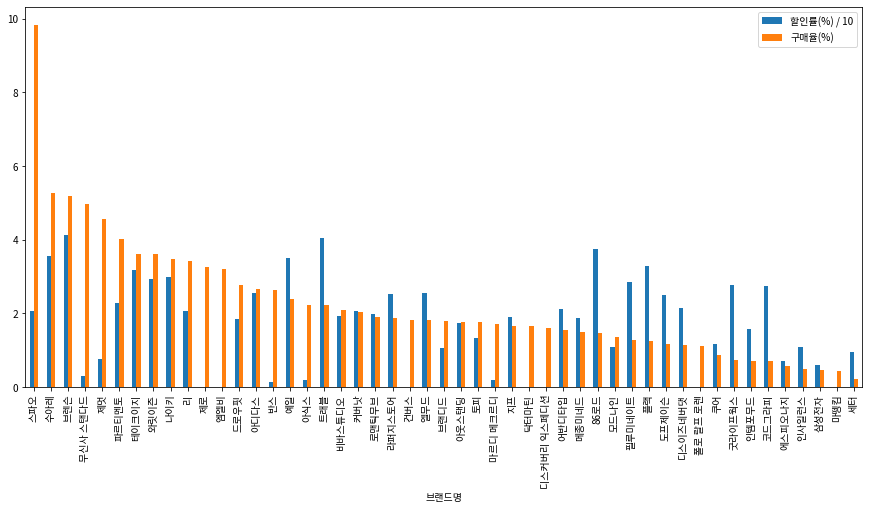

In [24]:
# bar_width = 0.35
# index = use_sale_df.index

# plt.bar(index, use_sale_df['구매율'], bar_width)
# plt.bar(index + bar_width, use_sale_df['할인률(%)'], bar_width)

# plt.gcf().set_size_inches(25,10)

use_sale_df.plot(x='브랜드명', y=['할인률(%) / 10', '구매율(%)'], kind='bar', figsize=(15, 7))